In [38]:
%load_ext autoreload
%autoreload 2
import os
import copy
import scipy
import numpy as np
import matplotlib.pyplot as plt

from astropy import wcs
from astropy.io import fits
from astropy.table import Table, Column, hstack

from lvhuo.display import (display_single, display_multiple, \
                           draw_circles, draw_rectangles, SEG_CMAP)
from compsub.utils import azimuthal_average
from compsub.utils import extract_obj

plt.rc('font', size=15)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
img = fits.open('./Images/dr2_s18a_wide_129.6827_-0.0397_2.00arcmin_i.fits')[1].data
img = img[300:700, 300:700]

In [65]:
fake = np.zeros_like(img)
fake += 0.1 * np.random.normal(size=fake.shape)

In [34]:
corr = scipy.signal.correlate2d(img, fake, boundary='symm', mode='same')

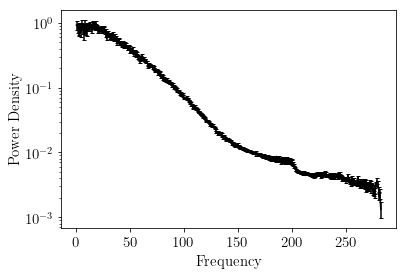

In [39]:
psd2D = np.abs(np.fft.fftshift(np.fft.fft2(corr)))
psd1D = azimuthal_average(psd2D, interpnan=True, stddev=True)
plt.errorbar(psd1D[0], psd1D[1] / psd1D[1].max(), yerr=psd1D[2] / psd1D[1].max(), fmt='k-', capsize=2)
plt.yscale('log')
plt.xlabel(r'$\mathrm{Frequency}$')
plt.ylabel(r'$\mathrm{Power\ Density}$')
#plt.text(33, 0.5, r'$\mathrm{Power\ Spectrum}$', fontsize=25)
plt.subplots_adjust(wspace=0.01)

# Detect 34 objects


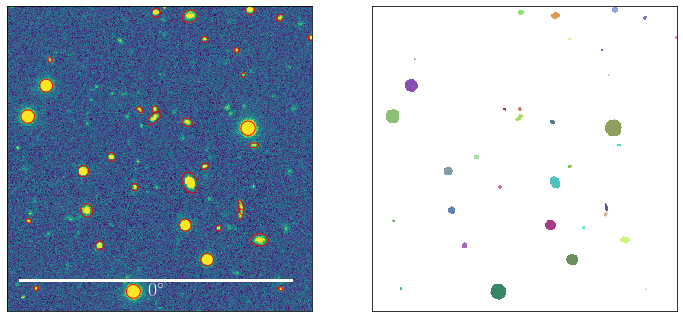

In [43]:
objects, segmap = extract_obj(img.astype(float))

In [53]:
from astropy.convolution import convolve, Gaussian2DKernel
bright_flag = (convolve(segmap, Gaussian2DKernel(5)) > 0.05).astype(float)
fake = img * (~bright_flag.astype(bool))

In [66]:
corr = scipy.signal.correlate2d(bright_flag, fake, boundary='symm', mode='same')

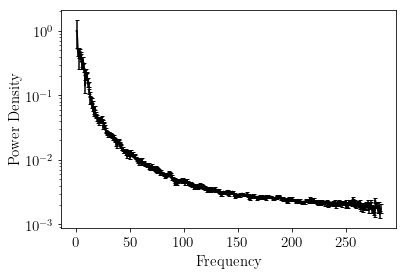

In [67]:
psd2D = np.abs(np.fft.fftshift(np.fft.fft2(corr)))
psd1D = azimuthal_average(psd2D, interpnan=True, stddev=True)
plt.errorbar(psd1D[0], psd1D[1] / psd1D[1].max(), yerr=psd1D[2] / psd1D[1].max(), fmt='k-', capsize=2)
plt.yscale('log')
plt.xlabel(r'$\mathrm{Frequency}$')
plt.ylabel(r'$\mathrm{Power\ Density}$')
#plt.text(33, 0.5, r'$\mathrm{Power\ Spectrum}$', fontsize=25)
plt.subplots_adjust(wspace=0.01)

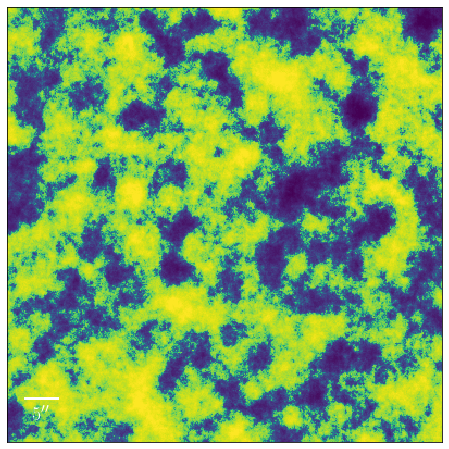

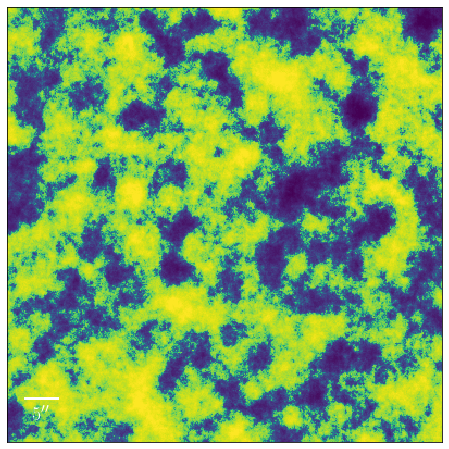

In [68]:
display_single(corr)